<a href="https://colab.research.google.com/github/blakeluther/UC-Newspaper-Analysis/blob/main/206_Final_Project_Blake_Luther.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hockey in the Concordiensis




## Introduction

This project will analyze Union College's newspaper, the Concordiensis to conduct a report on the school's hockey team, as its one of the flagship sports at our school. My interest in reseraching the college's hockey team resulted from my choice to attend Union College, while my father and brother both attended the Rensselaer Polytechnic Institute for higher education, further my mom, also, attended college in Troy. Since my brother went to RPI, it was my first time seeing Union play against RPI during RPI's themed blackout game. That game sparked my interest in Union College and RPI because of the geographic rivarly between the two schools in the sport. Especially after I accepted the offer to attend Union College, and because most of my family are RPI alumni, it was fun cheering against them during the games. This was my inspiration to create a report on our hockey team.

Within this report, I will take a look at the relative popularity of hockey by comparing the number of mentions that hockey has, that is counting the number of times the word 'hockey' was used in a particular year to that of other popular sports that Union has nowadays. Those sports include football, baseball (America's pastime) and lacrosee. I'm choosing to include other sports to gain a sense of when hockey became the school's main sport as it is the only Divison 1 sport today. I wonder if there used to be another dominant sport back in the 1900s, and by comparing the number of mentions of various sports each year can tell us this information. By using this data, we can see when Hockey was founded at the school, and we can narrow down major events by looking looking for years when the numer of 'hockey' mentions spikes dramatically. Furthermore, If I find any of these dramatic spikes in the number of mentions, I will take a deeper look into the events of the year to try and explain the dramatic rise in mentions for the hockey in that year.

Further, I am going to look for key players in the hockey scene. I want to see if the Concordy mentions a specific person related to sport and what contributions or drawbacks, he/she may have caused to the sport. I'm going to find the people who are mentioned the most in the Concordy over some timeframe and dive deeper into his/her specific events that happened during their coach/player seasons here at Union. However, I am going to focus on finding the negatives from these people as I think that is more interesting to know about rather than their success stories.



In [ ]:
# allowing access to the concordy dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import urllib
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError

folder = "https://cs-gitlab.union.edu/webbn/concordy/raw/master/Text/"

start_year = 1900
end_year = 2000
years = range(start_year,end_year+1)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.corpus import names
nltk.download('names')
all_names = []

for id in names.fileids():
  words = names.words(id)
  for word in words:
    all_names.append(word)

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Part 1: Sport Comparisons

This section will create a general overview of the relative popularity of some of the sports here at Union College. It will track the mentions of various sports such as hockey, football, baseball and lacrosse. My goal with this graph is to see if hockey was always the most popular sport according to the Concordy or if at a certain time another sport was more popular than hockey. I am interested in this comparison since nowadays, it seems that Union is quite known for its hockey team after winning the 2014 D1 NCAA Tournament.

### Data Collection - Mentions of Various Sports in the Concordy 

For this part, we used the timeframe of 1880 to 2000 to use the full dataset of the Concordy available to use. The general idea of this section is to track the number of the times a particular sport was mentioned each year in the timeframe. The four sports we are going to track are hockey, football, basball and lacrosse. Again, I choose to include these other sports in addition to hockey to track the relative popularity of the sport over the years to give more context as to when certain sports become more or less popular throughout the time frame.

*NOTE: Code for this section takes a long time to complete ~ 1 hour*

In [ ]:
hockey = []
football = []
baseball = []
lacrosse = []

start_year = 1880
end_year = 2000

years = range(start_year,end_year+1)

for year in years:
  # Set up a variable to hold ALL of the text FOR THAT YEAR
  year_text =""

  # There are typically 12 months in a year
  for month in range(1,13):

    monthStr = str(month)

    if month < 10:
      monthStr = "0"+monthStr

    # So I want the year and month as strings, so I can concatenate them
    # into a file path for me to open

    # Typically, we've written:
    # response = urllib.request.urlopen('path to file')
    # data = response.read()

    # Here I've just broken it down a bit more
    # I'm constructing the path
    # Then forming a request

    path = folder+str(year)+"-"+monthStr+".txt"
    req = Request(path)

    # I'm going to TRY to open the file
    # IF it works, I execute the stuff in the else statement
    # Which means I read the file as normal

    # IF it doesn't, I probably get some sort of error
    # (in this case a 404 file not found error)
    # In which case I should report it, and move on
    # You can see the error if you try to go here:
    # https://cs-gitlab.union.edu/webbn/concordy/raw/master/Text/1880-07.txt


    # SIDE NOTE: Which issues are missing and why? Some of them
    # are probably obvious - maybe others are not?

    try:
      urlopen(req)
    except HTTPError as e:
      pass
    except URLError as e:
      pass
    else:
      response = urllib.request.urlopen(path)
      data = response.read()      
      text = data.decode('utf-8') 
      year_text+=text

  # Once I've iterated through all the months
  # I have the text for the year
  # So now, work on it.
  # Notice I count ' men'. Why? Why the space?

  year_text = year_text.lower()
  hockeyCount = year_text.count('hockey')
  footballCount = year_text.count('football')
  baseballCount = year_text.count('baseball')
  laxCount = year_text.count('lacrosse')

  hockey.append((year,hockeyCount))
  football.append(footballCount)
  baseball.append(baseballCount)
  lacrosse.append(laxCount)

In [ ]:
year = 1904

sent_list = []

year_text =""
for month in range(1,13):
  monthStr = str(month)
  if month < 10:
    monthStr = "0"+monthStr
  path = folder+str(year)+"-"+monthStr+".txt"
  req = Request(path)
  try:
    urlopen(req)
  except HTTPError as e:
    pass
  except URLError as e:
    pass
  else:
    response = urllib.request.urlopen(path)
    data = response.read()      
    text = data.decode('utf-8') 
    year_text+=text
    sents = nltk.sent_tokenize(year_text)
    for sent in sents:
      words = nltk.word_tokenize(sent)
      if 'hockey' in words:
        sent_list.append(sent)



In [ ]:
setlist = set(sent_list)
for sent in setlist:
  print(sent)

The thought which naturally occurs when talk- ing about a skating r:ink is that of a hockey team.
Mr. Arms speaks on skating rink and hockey team, asking for the election of a n1anager next Monday morning.
'The hockey rink at Williams has been com- P'leted.
A good hockey team would go a long way towards filling up the l.ong gap between foot ball in the fall and base b~ll in the spring.
why Union should not follow the exarnple or other -colleges a·nd have a hockey team ; less reason why she should not turn out a winning team.
On \Vednesda)·, Feb. 3, a hockey te~~tn, fair- ly representative of Union, uefeated U. C. I. on the 1Vlohawk I-Iockey Club's rink.
The hockey rink at \\rillian1s has bc~n co111- 11ldcd.
In view of this, vvhy not organize a hockey teatn.


### Graphical Representation

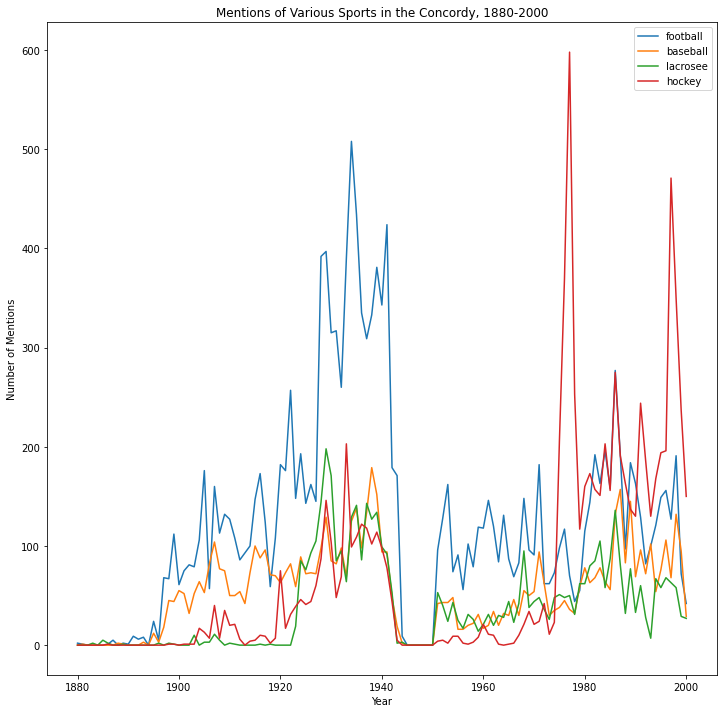

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

start_year = 1880
end_year = 2000

years = range(start_year,end_year+1)

hockeyCounts = [count for year, count in hockey]

plt.plot(years, football,label='football')
plt.plot(years, baseball,label='baseball')
plt.plot(years, lacrosse,label='lacrosee')
plt.plot(years, hockeyCounts,label='hockey')

plt.title('Mentions of Various Sports in the Concordy, 1880-2000')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend()
plt.show()

### Conclusion From Data Collected

From the graph above, we can see that hockey wasn't the most talked about sport until the middle of the 1970s, where it overtook football for some years. Let's take a look at the first part of the graph, that is from the year 1880 to about 1942 or the beginning of World War 1. We can see the hockey wasn't that popular in the beginning, with hockey and baseball and sometimes lacrosse were mentioned more often than hockey was. It was contridictory to my initial thought, where I assumed that Hockey was always the top sport at the college. When in reality it seemed that football was the main sport of the college up until modern days.

Hockey was first mentioned a few years after the year 1900 in the Concordy. This suggests this is when the sport first started. We can see that when it was first introduced, it slowly gained popularity in the Concordy, overpassing both lacrosse and baseball at times during the mid 1920s up until the 1940s. However, in most years, hockey was mentioned much less than all the other sports listed. 

In the 1930s, we know that Adolf Hitler rose to power in Germany, and soon after he led the invasion of Poland invoking war responses from Britain and France because of the alliance system in Europe. Eventually, the United States was forced into the War in 1941 kickstarting our economy out of the Great Depression. At the same time, Union College must have suspended all athletic programs when analyzing the sharp descent of the number of mentions of all sports to zero for the years the war was active since this drop was close to the intital date of the United States' entry into the the war.

After the war, we can see that hockey struggled to regain its position in the popularity of sports, having a much slower gain in overall mentions in the Concordy after the war, as opposed to the other sports that increased in mentions much steeper. Afterwards we see that hockey steadily grows in the Concordy after World War 1, then we see a dramatic spike in mentions in the 1970s overtaking all the sports listed even football, the long time king of sports section of the Concordy. Ever since this spike for hockey, football struggled to overtake it again, albeit there were some years that football was mentioned more, but in the overall sense, after the mid 1970s, hockey became the new king of the Concordy. Additionally, another event occurred around the mid 1990s with another large spike in the number of mentions in the sport.







### Inception of the Hockey Team

During our data collection, we collected the number of mentions each year and created a list of tuples consisting of the year and the corresponding number of mentions. This allows us to find the exact year that hockey first started and what year the number of mentions of hockey grew to new highs in the 70s and 90s. 

We can see that in 1904, the number of mentions grew 17x in the Concordy from the previous year, growing from 1 mention in 1903 to 17 in 1904. This explosive rise in mentions infers that the sport was started around this time. Additionally, I found the sentences that mentioned hockey in 1904, and it seems by these sentences that it was indeed founded this year, by the following sentences taken from the Concordy from that year:

> why Union should not follow the example or other colleges and have a hockey team; less reason why she should not turn out a winning team

and,

> A good hockey team would go a long way towards filling up the long gap between football in the fall and baseball in the spring.
In view of this, why not organize a hockey team.

There seemed to be quite a bit of positive sentiment towards the creation of the hockey team, a welcome addition to the current sports at the college. Eventually this proposition was passed as another sentence mentioned the college's team, saying:

> On \Vednesda)·, Feb. 3, a hockey team, fairly representative of Union, uefeated U.C.I. on the Mohawk Hockey Club's rink.

This sentence give more proof to 1904 being the year that the hockey team was founded at Union.


*NOTE: Sentences are edited for grammer and spelling, where identification of words was known*

### Further Analysis on the Graph Above

There are two more sections on the graph above that I want to take a look at, specifically the two steep inclines, one in 1970s and the other in the 1990s. Again, I'm going to find the years that have the two highest counts on the graph since these correspond the times I want. I already have a list of tuples for each, reading as (year, number of mentions in that year). Here we are going to sort the second values in decreasing order (highest count at the top). To do so, I am going to use:
```
hockey.sort(key=lambda x: x[1],reverse=True)
```
After such code, I will have the two years that have the two highest counts.

In [ ]:
hockey.sort(key=lambda x: x[1],reverse=True)

In [ ]:
highest = hockey[0]
second = hockey[1]
print(highest)
print(second)

IndexError: ignored

### 1977 and 1997 Analysis

Using the method above, I found that in 1977, there were 598 mentions of the word 'hockey' in various sentences throughtout the year, while in 1997, there were 471 mentions of the word throughout the year. As so, we are going to take a look into the specifics of the year to see if we can find anything interesting in either, either negative or positive about the team. 

### 1977 Deep Dive

For this part, we are going to extract the sentences from 1977 that contain the word hockey to narrow the sentences down to what we want to look.

#### Data Collection

In [ ]:
year = 1977

sent_list = []

year_text =""
for month in range(1,13):
  monthStr = str(month)
  if month < 10:
    monthStr = "0"+monthStr
  path = folder+str(year)+"-"+monthStr+".txt"
  req = Request(path)
  try:
    urlopen(req)
  except HTTPError as e:
    pass
  except URLError as e:
    pass
  else:
    response = urllib.request.urlopen(path)
    data = response.read()      
    text = data.decode('utf-8') 
    year_text+=text
    sents = nltk.sent_tokenize(year_text)
    for sent in sents:
      words = nltk.word_tokenize(sent)
      if 'hockey' in words:
        sent_list.append(sent)

In [ ]:
posSents = []
negSents = []

for sent in sent_list:
  score = sia.polarity_scores(sent)
  if score['compound'] >= 0.05:
    posSents.append((sent, score['compound']))
  elif score['compound'] <= -0.05:
    negSents.append((sent, score['compound']))

In [ ]:
pos_ratio = (len(posSents) / len(sent_list)) * 100
neg_ratio = (len(negSents) / len(sent_list)) * 100
print(pos_ratio)
print(neg_ratio)

45.10690789473684
20.641447368421055


#### 1977 Initial Analysis
After analyzing these sentences for sentiment using the VADER Sentiment Intensity Analyzer, I found that for the sentences for the year:

* 45.11% were positive
* 20.64% were negatives
* 34.25% were neutral

These percentages, at least to me, show me that this year was relatively positive with positives having a 25 percentage lead over that of negtaives sentences. Further down below, I am going to sort the sentences by most positive and most negative and form a conclusion based on the top ten rated in both directions.

In [ ]:
posSents = list(set(posSents))
negSents = list(set(negSents))

In [ ]:
posSents.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
  print(posSents[i])

('We wish the hockey te.am the best of luck and hope responsible administrators conduct our hockey program with the· air of academic integrity that befits Union.', 0.9493)
("We wish the hockey team the best of luck and hope responsible administrators conduct our hockey program with the 'air of academic integrity that befits Union.", 0.9493)
('In the document Bonner reveals to the entire campus a concept presented in September to the faculty, Union as a ••comprehensive college in a university setting.\\ Implicit to this concept, Bonner suggests, is \\the possibility, already demonstrated by the success of ice hockey, of high visibility and public support for athletics of a kind found in a small college town\\ and e·xpansion in continuing education programs, development of stronger ties · with Union University, and releasing the creative impulses in the lAM.\\ In this report Bonner also states that he has \\committed myself to ledge ot campu!l .', 0.9392)
('I extend my sincere hopes that

In [ ]:
negSents.sort(key=lambda x: x[1])
for i in range(10):
  print(negSents[i])

('As for the validity of these events ma!lY .of the staff-members refused to talk or even have their name printed for the exact reason tbat they refuse to print articles about .the hockey players: fear of violence.', -0.8999)
('Sandy Adams Pat Gageant Carol Milden eoollt heys c/o the Editors To the BOYS in Section 9: After having endured your offensive behavior during the past several hockey games (espedally the Willia;ns game), I feel compelled to express my disgust and disappointment at your actions.', -0.875)
('Will Shupe become the scapegoat for the immoral and unethical actions that have been rampant in our hockey program?', -0.8402)
("De•r Editor: The head .coach lies to his supetiors and is twice caught · using ineligible players - the · director of admissions is fired · for falsifying athletes' records - the college is forced out of a high.ly prestigious athletic conference because of its questionable athletic policies ~ the president of a great institution speaks with forked t

#### 1977 Positives and Negatives Analysis

From the top ten rated positive sentences, we can tell that the team had a good season by the following:
> Also, we feel that the hockey team deserves some credit and respect because they are talented people who work hard to maintain their winning record. (0.9001)

and, 

> But, and it is a very strong but the excitement generated by our hockey program, and community involvement as spectatdrs, has given us a tremendous boost in recruiting and motivating volunteers, and helped create an atmosphere of exciternent and involvement. (0.8908)

and lastly,

>We wish the hockey team the best of luck and hope responsible administrators conduct our hockey program with the air of academic integrity that benefits Union. (0.9493)

The team not only had a great season, but seemed to provide a cloud of excitement for everyone at the school and energized the community as a whole. This energized community and the team's winning spirt, no doubt contributed to the this dramatic rise of interest in the Concordy for Hockey. Out of interest, I googled for [Union's record](https://www.collegehockeynews.com/reports/teamHistory/Union/54) for both the 1976-77 season and the 1977-78 season because the year could refrence both of them. However, these Concordy articles must be refrencing the prior season as they went 22-3-1 under Ned Harkness and, in the next season, they went 4-1-1 under Harkness and 0-13-0 under Bob Driscoll. I wonder if something happened during this second season that shattered the excitement after everything was going so well for the team.

To see what happened that caused the team to go on a losing streak under Driscoll, I analyzed the negative sentences of the year, and by looking at the top ten worst ranked sentences, there seemed to be a large scandal involving the adminastration and the coaching staff:

>Dear Editor: The head coach lies to his superiors and is twice caught · using ineligible players - the director of admissions is fired for falsifying athletes' records - the college is forced out of a highly prestigious athletic conference because of its questionable athletic policies ~ the president of a great institution speaks with forked tongue whenever hockey is the subject - the campus and its alumni body are torn apart as the battle wages over academic integrity versus jock-school behavior." (-0.8176)

This event most likely caused the rapid decline in their seasonal ranking, and explains why Driscoll took control of the team. It's interesting that the school decided to take action against the team since the team was doing so well beforehand under Harkness, and try to continue riding that momentum because obvisouly he was a good coach because of the winning streak he had before. But the optics of a scandal that would have been much larger if they allowed it to continue, and rattled the community more. But, this is the event the most likely turned the year more to the negative sentiment side.


*NOTE: Sentences are edited for grammer and spelling, where identification of words was known*





### 1997 Deep Dive 



#### Data Collection

In [ ]:
year = 1997

sent_list = []

year_text =""
for month in range(1,13):
  monthStr = str(month)
  if month < 10:
    monthStr = "0"+monthStr
  path = folder+str(year)+"-"+monthStr+".txt"
  req = Request(path)
  try:
    urlopen(req)
  except HTTPError as e:
    pass
  except URLError as e:
    pass
  else:
    response = urllib.request.urlopen(path)
    data = response.read()      
    text = data.decode('utf-8') 
    year_text+=text
    sents = nltk.sent_tokenize(year_text)
    for sent in sents:
      words = nltk.word_tokenize(sent)
      if 'hockey' in words:
        sent_list.append(sent)

In [ ]:
posSents = []
negSents = []

for sent in sent_list:
  score = sia.polarity_scores(sent)
  if score['compound'] >= 0.05:
    posSents.append((sent, score['compound']))
  elif score['compound'] <= -0.05:
    negSents.append((sent, score['compound']))

In [ ]:
pos_ratio = (len(posSents) / len(sent_list)) * 100
neg_ratio = (len(negSents) / len(sent_list)) * 100
print(pos_ratio)
print(neg_ratio)

46.85890834191555
21.163748712667356


In [ ]:
posSents = list(set(posSents))
negSents = list(set(negSents))

In [ ]:
posSents.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
  print(posSents[i])

("\\'But there are more than enough good players out there to make up a good, competitive team espe- cially with a guy I ike Stan coach- ing them.\\ With his place in the Dutchmen's history book secure, Ford is looking forward to t11e remainder of theis successful hockey season.", 0.9221)
("He could hockey, but he's the one that got have come in with a passive atti- nie started.\\ tude, but he didn't He wanted Steve Ford played middle line- me to improve the defcnsi ve as- backerandoffensiveguard for his pectofmy game for my benefit.", 0.9209)
('Either [the matches \\vere] won 6-1, 7-0, or were l<>st ()-7, l-6.\\ The clos- est match d ttring the season came when Un hn faced RPI and won 7-2 were presented last evening at the Block U ceremonies: Freshman Ryan Cantpbell won the Freshman Male Athlete of the Year award for his contributions for the Skating Dutchmen hockey club.', 0.9136)
('Our Division I hockey team is something that students, faculty, and alumni are very proud of, and woul

In [ ]:
negSents.sort(key=lambda x: x[1])
for i in range(10):
  print(negSents[i])

('NESCAC forbade coaches from performing in- heuse visits, but Harkness had, on several occasions; broken this,rul:e. The next day, ,Bonner suspended Harkness, conve- niently shortly after the end of the hockey season .. Later that week, Iilarkness ad- mi~ed in a Nel.V York Times ar- ticle,.', -0.8519)
('Field Hockey Looks For Playoff Berth by Stefanie Speanburg St«ff Writer After a disappointing week of losses against Roches!er and Wil~ liam Smith, the field hockey team bounced back, defeating Vassar and Oswego.', -0.8313)
("And if the hockey players don't feel comfortable in the new rink, then recruitment \\vill suffer and the quality of the team may decline.", -0.7353)
("began to come to people's at- Why Things Went Wrong Bonner's problems began in 1976 after the hockey team's immediate climb.", -0.7003)
('vision I, but NESCAC (New England Small College Athletic Conference) refused to allow Union to belong to NESCAC and bring hockey up to Division I. NESCAC believed that ath- letics

#### 1997 Deep Dive - Initial Analysis
Again, after using the VADER sentiment analyzer on the sentences that conainted the word 'hockey', the breakdown of positive to negatives sentences are:

* Positives - 46.86%
* Negatives - 21.16%
* Neutral - 31.98%

Just as it was in 1977, the percent of positive sentences was about 25 percentage points higher this time than the percent of negatives sentences. However, the pecent of negative sentences increased by about 0.50% compared to 1977 but, on the other hand, the percent of positive sentences increased by about 1.5% over 1977 resulting in fewer neutral sentences this year. Overall, it seemed to be another postive year, however, a scandal may have broken out like in 1977 that resulted in this increase of negative sentence.


#### 1997 Positives and Negatives Analysis

From the top rated positive hockey sentences from the year, we can see that hockey team seemed to be successful and contributing to the community postively. There are many sentences that imply that this is happening such as:

>Our Division I hockey team is something that students, faculty, and alumni are very proud of, and would all love to keep their games on our beloved campus.

and,

>'But there are more than enough good players out there to make up a good, competitive team especially with a guy like Stan coaching them. With his place in the Dutchmen's history book secure, Ford is looking forward to the remainder of theis successful hockey season.

and lastly,

> I think some of our goals are reaching the playoffs, giving the fans a play- off game at home, and just continuing as far as we can and getting as much respect and recognition as we can. How does he want Union College hockey to be thought cf after he leaves?

From the second sentence, we can see that Coach Stan is leading the team in a winning streak and seems to be leading them to the playoffs for the season. Also, it seems that the Union community is supportive of the team from the first sentence saying, " Our Division I hockey team is something that students, faculty, and alumni are very proud of" and I think this sentiment from the community pushed the team to play harder for the community. A quote from the third excerpt says: "our goals are reaching the playoffs... just continuing as far as we can and getting as much respect and recognition as we can". Whoever said this, I assume one of the players or Coach Stan, want to push hard for the community and win as much as they can. Additionally, the last sentence of the third excerpt mentions that this person is leaving soon, possibly after the season wraps up since the author writes, "How does he want Union Collge hockey to be thought of after he leaves?". This can only mean that he wants to leave the hockey team in better place than where it was. Additionally, it should be noted that the team is currently in Divison 1 hockey, that is quite exciting news, if they weren't in it before.

Upon looking at the top negatively rated sentences, there wasn't much particularly interesting in them. Most of the sentence revisited the previous recruiting scandal back in 1977 involving Harkness. I'm not going to include this information since it doesn't pertain to the year at hand, however, I will be exploring more about Harkness in a later section. Excluding the statements about the previous years, there was a little fiasco about renovating the Achilles Rink or constructing a new rink in its place. In one of the sentences, President Hull mentioned that due to finances, student reactions and alumni reactions to the idea, that a new facility would be easier to raise money for rather than raising money for a renovation. A worry for the construction of the new rink was,

> And if the hockey players don't feel comfortable in the new rink, then recruitment will suffer and the quality of the team may decline.

This may have been a concern for many related to the hockey scene as they would hate to see the team suffer due to worries/ complications from a new rink when the old rink was fine to use.








## Part 2: Finding Key Players

In this section, we are going to focus on a smaller timeframe, more specifically from the year Union was accepted into ECAC Division 3 league up until the latest edition in the newspaper, and during this time, Union, also, made the transition to Division 1 hockey in 1991. We are going to attempt to find the names of people who are mentioned considerbly in the Concordy who are, also, related to the hockey team.

### Data Collection - Key People

In the section below, we are going to extract the names of people that are highly associated with the hockey team, that is people who are mentioned considerbly in sentence that, also, contain the word 'hockey'.

First, we need to a create a rough copy of names from the text in the time frame of 1970 to 2000. For each year in the time frame, we split the text from the entire year into sentences using the built-in sent_tokenize method from the Natural Language Toolkit module (NLTK). From there, we took each sentence and split it into words using the NLTK method of word_tokenize. After tokenizing the sentence, we cleaned the resulting words, removing any words that are in the set of the English stopwords or in string.punctuation.

Now, we checked whether the resulting clean_words contained the word 'hockey', and if it did, I ran the words through the NLTK's part of speech tagging built-in method. This method takes every word and labels each word such as nouns, adjectives, verbs,...etc. Some examples include:


*   JJ - adjective - 'small'
*   NN - noun, singluar - 'desk'
*   NNS - noun, plural - 'desks'
*   NNP - proper noun, singular - 'Harrison'

*POS-tags found on [POS-Tagging-NLTK](https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/)*

After obtaining the POS-tags for each word, we filtered the words and only kept the words that were taggged with the POS tag of 'NNP' meaning proper noun, singular which results in first names, last names, places,... etc. Using,

```
[word for word,pos in pos_tags if pos == 'NNP']
```

Out of those words, I created a list of bigrams and added each to a list that housed bigrams from the entire time frame. At this point, we have a large list of potential names from the text that are related to the hockey scene conisdering we only took the words are that 'NNP' tagged and words that are in the same sentence as the word 'hockey'.





In [ ]:
people_names = []

stop = stopwords.words('english')

start_year = 1970
end_year = 2000
years = range(start_year,end_year+1)

for year in years:
  # Set up a variable to hold ALL of the text FOR THAT YEAR
  year_text =""

  # There are typically 12 months in a year
  for month in range(1,13):

    monthStr = str(month)

    if month < 10:
      monthStr = "0"+monthStr


    # So I want the year and month as strings, so I can concatenate them
    # into a file path for me to open

    # Typically, we've written:
    # response = urllib.request.urlopen('path to file')
    # data = response.read()

    # Here I've just broken it down a bit more
    # I'm constructing the path
    # Then forming a request

    path = folder+str(year)+"-"+monthStr+".txt"
    req = Request(path)

    # I'm going to TRY to open the file
    # IF it works, I execute the stuff in the else statement
    # Which means I read the file as normal

    # IF it doesn't, I probably get some sort of error
    # (in this case a 404 file not found error)
    # In which case I should report it, and move on
    # You can see the error if you try to go here:
    # https://cs-gitlab.union.edu/webbn/concordy/raw/master/Text/1880-07.txt


    # SIDE NOTE: Which issues are missing and why? Some of them
    # are probably obvious - maybe others are not?
    try:
      urlopen(req)
    except HTTPError as e:
      pass
    except URLError as e:
      pass
    else:
      response = urllib.request.urlopen(path)
      data = response.read()      
      text = data.decode('utf-8') 
      year_text+=text
      sents = nltk.sent_tokenize(year_text)
      for sent in sents:
        words = nltk.word_tokenize(sent)
        cleaned_words = [word for word in words if word not in stop and word not in string.punctuation]
        if 'hockey' in cleaned_words:
          pos_tags = nltk.pos_tag(cleaned_words)
          npp_words = [word for word,pos in pos_tags if pos == 'NNP']
          nnp_bigrams = list(nltk.bigrams(npp_words))
          for bgm in nnp_bigrams:
            people_names.append(bgm)


In [ ]:
from collections import Counter
people_counts = Counter(people_names)

In [ ]:
print("The top five most common Singular Proper Noun bigrams are {}.".format(people_counts.most_common(5)))

The top five most common Singular Proper Noun bigrams are [(('Union', 'College'), 1147), (('Achilles', 'Rink'), 399), (('Ned', 'Harkness'), 347), (('Division', 'II'), 176), (('Union', 'Division'), 172)].


### Problem with current Data Collection

There is glaring problem with the current state of the names from the text. After running using the Counter from the Collections module, we found that the top 5 most frequent singular proper noun bigrams are:

* ('Union', 'College') = 1147
* ('Achilles', 'Rink') = 399
* ('Ned', 'Harkness') = 347
* ('Divison', 'II') = 176
* ('Union', 'Division') = 172

This is a major problem as most of these bigrams are not people and instead, its the name of the college and its rink, and what divison Union plays in. At this point, we need to filter a lot of these bigrams and find the ones that are only names. To do this, I found a corpus from NLTK that contains both common male and female names which is called names.

We imported the names corpus and added all the names from both the 'male.txt' and the 'female.txt' files in the corpus and added the contents of both to a list that would contain all the names.

After obtaining the list of all female and males names, I, then had to go thorugh each tuple from the previous list of bigrams from earlier. My method for sorting through these tuples was the following line of code

```
[(tup1, tup2) for tup1, tup2 in people_names if tup1 in all_names]

all_names containing the names from the names corpus
people_names containing the bigrams of singular proper nouns in the text.
```
This went through each tuple and checked the first part of the tuple and checked to see if was inside of the all_names list, and it it was, it would add the tuple bigram and if it didn't it wouldn't add the bigram to the list. My thinking for this part was to look for first names assuming most of the names in the Concordy text from this period are, also, in the names corpus. This would find the first names of people and their last names by co-incidence since they are bigrams, and this is what I was looking to do from the beginning. 


In [ ]:
from nltk.corpus import names
nltk.download('names')

all_names = []

for id in names.fileids():
  words = names.words(id)
  for word in words:
    all_names.append(word)

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [ ]:
exclusion_words = ['Ivy', 'Tuesday']
cleaned_tups = [(tup1, tup2) for tup1, tup2 in people_names if tup1 in all_names and tup1 not in exclusion_words]

In [ ]:
bigram_strings = [' '.join(tup) for tup in cleaned_tups]
counts = Counter(bigram_strings)


### wordCloud after cleaning the text further

Below, is the resulting word cloud of the most common names in the text from the time period of 1970 to 2000. As with the word clouds we've done before, the larger a name is, the greater number of times the person was mentioned in the text.

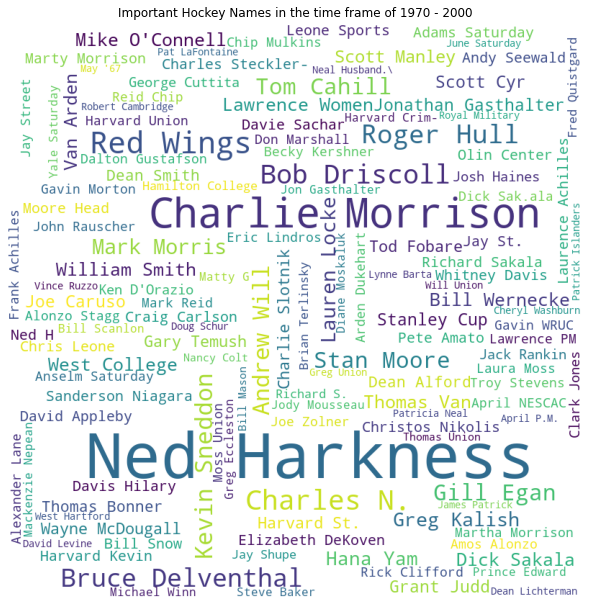

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(width = 800, height = 800,
                  background_color = 'white',
                  min_font_size = 14
                  )

wordcloud = cloud.generate_from_frequencies(counts)

plt.figure(figsize =(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title("Important Hockey Names in the time frame of 1970 - 2000")

plt.show()

From the word cloud, we can see that two names in particular stand out the most from the word cloud are "Ned Harkness" and "Charlie Morrison". I assume that these two are quite important to the sport as a whole.

#### Table of the Most Common Names in the Concordy

The table is created using the same counts as the word cloud above, however, in this form, it is easier to tell who is more common than other person. In word clouds, it can be hard to tell who is the most common since every name is relative to each other. It can be hard to tell if one name is slightly larger or smaller than another name of the about the same size. That is why I decided to add this graph of the 25 most common names who are mentioned in sentences that have the word hockey in it. However, after looking at the resulting most common graph, I saw some words that I should filter out such as "Tuesday" and "Ivy", thus I added a section that would filter out words if the first part of the tuple contained any of these words.

Text(0.5, 0, 'Count')

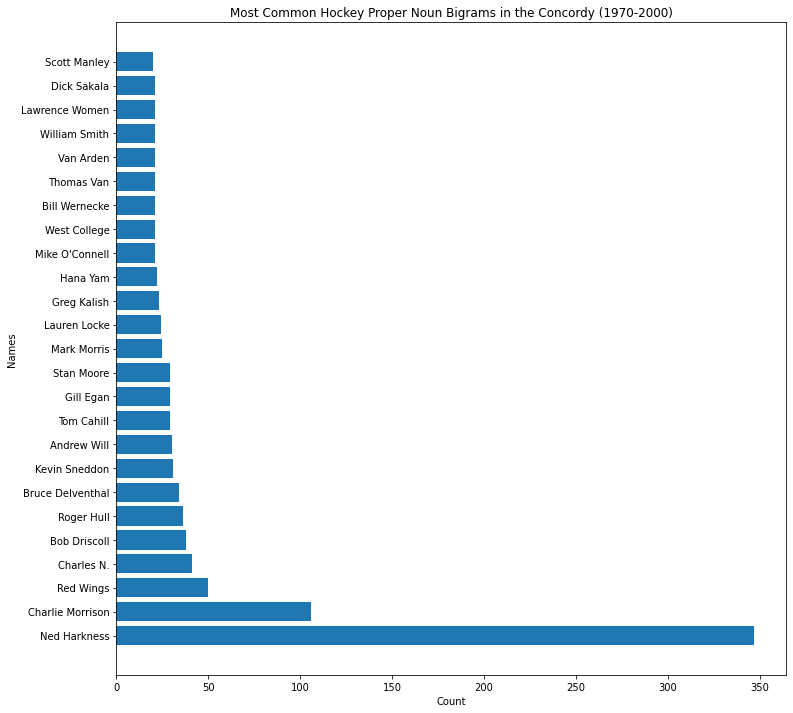

In [ ]:
most_common = dict(counts.most_common(25))

plt.figure(figsize=(12,12))
plt.barh(list(most_common.keys()), list(most_common.values()))
plt.title("Most Common Hockey Proper Noun Bigrams in the Concordy (1970-2000)")
plt.ylabel('Names')
plt.xlabel('Count')

### Key Figures Conclusion

We are going to use both the word cloud and the bar chart in our analysis of the key figures in the hockey scene in the timeframe of 1970 - 2000. Just from looking at the graph and the word cloud, we see one name that stands out from the rest, that name is Ned Harkness. Furthering my simple analysis of the word cloud above, we can see the Ned Harkness was mentioned approximately 7x more than the 3rd most common, and Charlie mentioned was 2x more often the the 3rd most common. These people must be extremely important to the scene of hockey here at Union.

Upon a more in-depth search for Ned Harkness, I found that he was a NCAA head coach of ice hockey and lacrosse at Rensselaer Polytechnic Institute and Cornell University and of ice hockey at Union College. At his time at RPI, he revived the ice hockey team to a record of 176-96-7 in his 14 years of coaching. Later, after coaching at Cornell and the Detroit Red Wings, he moved back to the Capital Region and was signed at Union College. He helped rebuild the hockey team from the ground up after the closure of the program during World War 2. He coached the team in Divison III and the team was quite successful. He went 20-4-1 in the 1975-76 season and 22-3-1, the year after.

Charlie Morrison was another successful coach in his time at Union. He took over the men's hockey program in 1978, helping the way to eventually transition to NCAA Division III to Divison I. As head coach of the team, he led the team to three straight NCAA tournaments and ranks second all-time with 122 career victories. Additionally, Charlie Morrison was inducted into the Union Athletics Hall of Fame in 2015.

Now, for some of the other names on the list, although less important it seems, I will list their contribution the school's hockey team.

* Bob Driscoll - Coach - 1977-81
* Roger Hull - President of Union College - Allowed Hockey to go D1
* Bruce Delventhal - Head Coach of team during transition to D1
* Andrew Will - Top Defensive Defenseman in ECAC - 1997
* Gil Egan - Union's all time men's ice hockey leader in goals at 83 and third in all-time points with 147. When he was on the team, Union averaged 15 wins per season for the four year. Union won a ECAC D3 Championship and also, during this time Union was ranked #2 and #3 nationally during his career. Additioanlly, he was inducted in the Union Althletic Hall of Fame in 2008.

I'm not discrediting these or the rest of the players from their achievements, however, I don't think there is enough information in the Concordy to explore further on some of these people. With that in mind, below I will be following the mentions of Ned Harkness and Charlie Morrison below based soley on the fact that these two are explicity mentioned the most in the text, thus, hopefully, having the most information available to analyze.





*Note: the bigrams on the chart/ wordCloud are not necessarily names. Assuming errors in the data and the extent of proper singular nouns in the text and similarity to the names corpus*

## Part 3: Following the mentions of Ned Harkness and Charlie Morrison

This part will focus on the sentences that both coaches are mentioned in, however, I am going to focus on the negative part of these coaches rather than the positives to find more any scandals or crisis they may have been involved in.

In [ ]:
harkSents = []
morSents = []

harkCounts = []
morCounts = []

start_year = 1970
end_year = 2000

years = range(start_year,end_year+1)

for year in years:
  
  # Set up a variable to hold ALL of the text FOR THAT YEAR
  year_text =""

  # There are typically 12 months in a year
  for month in range(1,13):

    monthStr = str(month)

    if month < 10:
      monthStr = "0"+monthStr


    # So I want the year and month as strings, so I can concatenate them
    # into a file path for me to open

    # Typically, we've written:
    # response = urllib.request.urlopen('path to file')
    # data = response.read()

    # Here I've just broken it down a bit more
    # I'm constructing the path
    # Then forming a request

    path = folder+str(year)+"-"+monthStr+".txt"
    req = Request(path)

    # I'm going to TRY to open the file
    # IF it works, I execute the stuff in the else statement
    # Which means I read the file as normal

    # IF it doesn't, I probably get some sort of error
    # (in this case a 404 file not found error)
    # In which case I should report it, and move on
    # You can see the error if you try to go here:
    # https://cs-gitlab.union.edu/webbn/concordy/raw/master/Text/1880-07.txt


    # SIDE NOTE: Which issues are missing and why? Some of them
    # are probably obvious - maybe others are not?

    try:
      urlopen(req)
    except HTTPError as e:
      pass
    except URLError as e:
      pass
    else:
      response = urllib.request.urlopen(path)
      data = response.read()      
      text = data.decode('utf-8') 
      year_text+=text

  # Once I've iterated through all the months
  # I have the text for the year

  year_text = year_text.lower()
  sents = nltk.sent_tokenize(year_text)
  for sent in sents:
    words = nltk.word_tokenize(sent)
    harkCount = words.count('harkness')
    if harkCount > 0:
      harkSents.append(sent)
    bigrams = list(nltk.bigrams(words))
    morCount = bigrams.count(('charlie','morrison'))
    if morCount > 0:
      morSents.append(sent)

  harkCount = year_text.count('harkness')

  words = nltk.word_tokenize(year_text)
  
  bigrams = list(nltk.bigrams(words))
  morCount = bigrams.count(('charlie','morrison'))

  harkCounts.append(harkCount)
  morCounts.append(morCount)

  


## Chart of Overall Mentions of Harkness and Morrison

The chart below shows the number of occurences that both Ned Harkness and Charlie Morrison were mentioned in the Concordy over the 30 year time frame. We can see that these two were mentioned over different times, Ned Harkness was mentioned the most from 1974 - 1978, with some lasting influence on the Concordy as he saw some mentions later one, even though he wasn't coach. While on the other hand, Morrison was seen much less from the time frame of 1978 - 1989 with very little lasting influence on the Concordy in the future.

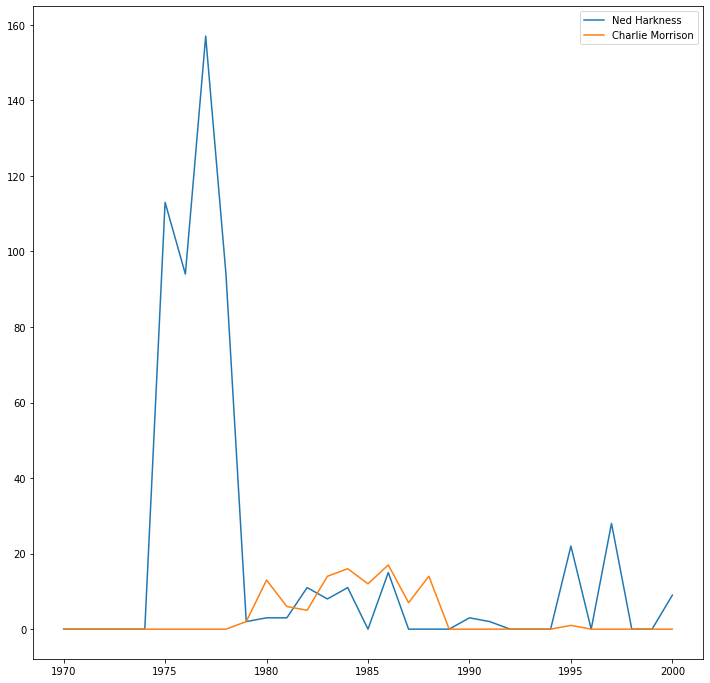

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.plot(years, harkCounts,label="Ned Harkness")
plt.plot(years,morCounts,label='Charlie Morrison')
plt.legend()
plt.show()

### Sentiment Analysis of Ned Harkness mentions



In [ ]:
pos_count = 0
neg_count = 0

pos_sents = []
neg_sents = []

for sent in harkSents:
  score = sia.polarity_scores(sent)
  if score['compound'] > 0.05:
    pos_count += 1
    pos_sents.append(sent)
  elif score['compound'] < -0.05:
    neg_count += 1
    neg_sents.append(sent)



In [ ]:
print((pos_count/len(harkSents)) * 100)
print((neg_count/len(harkSents)) * 100)

44.72168905950096
23.80038387715931


### Initital Thoughts on Ned Harkness

After collecting the the number of sentences that mentioned 'Harkness' in it in reference to Ned Harkness. I choose to use his last name because sometimes people can be refered to as Mr.Harkness and Coach Harkness since he was a coach rather than just explicity Ned Harkness. Thus this increased the overall exposure of him to the data. I used the sentences to complate a sentiment analysis of the sentence he was mentioned it, to see if he was mentioned more in a positve light or a negative light. My method for deciding if it was a positive or negative sentence was using the Sentiment Intensity Analyzer and using the compound section of the score to decide. My metrics were if the sentence had a compound score of greater than 0.05, it would be considered a postive sentence and if the score was less than -0.05, it would be considered a negative sentence. After collecting the counts of both negative and positive sentences. I divided it by the total number of sentences that Harkness was mentioned it and multiplied by 100 to get a percentage. My findings were:

* Positive - 44.72%
* Negative - 23.8%
* Neutral - 31.48%

Overall, he seemed to be in good light most of the time. However, I want to look into the times he was not mentioned positively but rather negatively. I want to see if he was involved in a problematic situation or he was just not well recieved by some students. Whatever the case, I want to see why he was portrayed negatively during some of these sentences.

### Finding Harkness' Negative scenes - More Data collection

As mentioned above, we know that Harkness seemed to be involved in a scandal regarding his recruiting practices. We are going to see if we can find more information about this. At this point, the only sentences I'm working with are the ones that are considered negative by a simple metric of the sentence having a sentiment compound score of less than -0.05. In this section, we are going to further break down these sentences by overall sentiment score, however, this time we are going to break them down into tiers for increasing negativity. Although there are 124 negatively measured sentences in total, I am going to focus on those sentences that are scored less than -0.50 compoundly to hone in on any extremely negative sentences about him.

In [ ]:
lowMaxInf = []

for sent in neg_sents:
  score = sia.polarity_scores(sent)
  if (score['compound'] < -0.50):
    lowMaxInf.append((sent,score['compound']))


In [ ]:
lowMaxInf.sort(key=lambda tup: float(tup[1]),reverse=True)

In [ ]:
for i in range(10):
  print(lowMaxInf[-i-1])

("ned harkness killed tbat .gn~at winter sport when he drove the director of curling off the campus following a confrontation memorable for harkness's gaul~iter style of abuse.", -0.9001)
('shortly after the senate meeting, coach harkness was suspended for lying to bonner about recruiting violations.', -0.872)
('shortly after the sel}ate meeting, coach harkness was suspended fm lying to bortner about recruiting violations.', -0.872)
('nescac forbade coaches from performing in- heuse visits, but harkness had, on several occasions; broken this,rul:e. the next day, ,bonner suspended harkness, conve- niently shortly after the end of the hockey season .. later that week, iilarkness ad- mi~ed in a nel.v york times ar- ticle,.', -0.8519)
("sad to note, of course~ that union's academic rejects, four harkness candidates, went on to harvard, yale, dartmouth in particular l remetnbe:r those first hockey games unckr the and cornell; no need to direction.", -0.8176)
("ln his statement harkness cite

### Analyzing Harkness' Negative Sentences

After collecting Ned Harkness' most negative sentences, above, we can confirm the Harkness was involved in a scandal concerning his recruiting practices. Rated at compound score of -0.872:

> shortly after the senate meeting, coach harkness was suspended for lying to bonner about recruiting violations

Harkness was caught up in a series of recruiting violations it seems. He performed in-house visits, a type of recruting mission that is restricted by the NESCAC. The sentence in the Concordy read: (Rated at -0.8519)
> nescac forbade coaches from performing in-h[o]use visits, but harkness had, on several occasions; broken this,rule. the next day, ,bonner suspended harkness, conveniently shortly after the end of the hockey season .. later that week, [h]arkness [ad- mi~ed] in a new york times article,.

The school seemed to disregard this violation as another sentence read: (rated at -0.7717)
>harkness denied ever visiting the student, but later admitted the truth saying, i lied, but i lied to save my hockey program. the violation was viewed as a minor offense by the school, and harkness was re-instated.

Furthermore, Harkness disregarded the academic standards for his players imposed by the college or the conference itself. A sentence rated at -0.8176, told us that some of Union's hockey prospects were academically rejected by the school, later played at Harvard, Yale and Darmouth. It's interesting that these students were academically prepared to play Union but were academically prepared to play at Harvard, Yale, and Dartmouth, three ivy leagues, who, in my opinion have higher academic standards. It seems that Union may have been too strict on their recruiting practices leading to their loss of potential prospects. In some minds, it could be seen that Harkness should have been in right, however, he wasn't at the time, going against the imposed rules on team, however, extremethe rules may have seemed.

 Additionally, his overall most negative sentence did not reflect this scandal rather his temper, as it was rated at -0.9001, which read:
> ned harkness killed [tbat .gnat] winter sport when he drove the director of curling off the campus following a confrontation memorable for harkness's gauliter style of abuse.

This sentence showcased his flaws, as well, it seemed that Harkness was more concerned about winning than playing by the rules and no one could get in his way. I wonder if the curling team wanted more practice time at the rink, but Harkness became livid at that causing his anger to be strong enough to kick them off campus. Overall, these negative sentences are providing truth that Harkness was here to win at all costs, disregarding rules and regulation. Expanding on a previous section, that told us that Harkness made Union's hockey team quite strong, he had an apitude to win, but caused many to dislike him in the process. This scandal is probably one of the major reasons as to why Ned Harkness hasn't been inducted into the Athletic Hall of Fame here at Union, but many of his counterparts have.

*Note: Sentence examples are, in some cases, corrected for grammer and spelling, brackets show new grammer or spelling that could not be interpreted correctly. Top ten most negatively scored sentences in raw format can be seen in code block above.*

### Sentiment Analysis of Charlie Morrison mentions 

In [ ]:
pos_count = 0
neg_count = 0

pos_sents = []
neg_sents = []

for sent in morSents:
  score = sia.polarity_scores(sent)
  if score['compound'] > 0.05:
    pos_count += 1
    pos_sents.append(sent)
  elif score['compound'] < -0.05:
    neg_count += 1
    neg_sents.append(sent)

In [ ]:
print((pos_count/len(morSents)) * 100)
print((neg_count/len(morSents)) * 100)

45.28301886792453
21.69811320754717


### Intial Thoughts about Charlie Morrison

As seen above, we analyzed Ned Harkness' negative sentences to find his most negative moments and his percieved negatives about him. The same process will be done with the same metrics with sentences having a compound score greater than 0.05 be denoted as a positive sentence, and a sentence with a compound score less than -0.05 be denoted as a negative sentence. We are going to see if we can find any similiar type of scandal/crisis that Charlie Morrison was involved in. A interesting comparison we can make already to Harkness is the percentage of postives sentences vs. negative sentences. Listed below:
* Positives - 45.28%
* Negatives - 21.69%
* Neutral - 33.03%

We can see that comparing to Harkness', Morrison percentage of postive sentences was about 1 percentage points higher while the percent of negative setences decreased by almost 2 percentage points and the share of neutral sentences decreased by almost 1 percentage points. From this comparison, the Concordy seemed to view Morrison slighty more favorable than Harkness. However, his negative sentences will give us more light to the question. 

#### Data Collection

When I was just searching for sentences that contained just the name 'morrison' I got additionall people that I did not want. Thus, my approach to finding the sentences that only mentioned Charlie Morrison was to split the sentence into words and create bigrams from the resulting words. From there I could check to see if the bigram ('charlie','morrison') was included in that list of bigrams , and if it was I could analyze the sentiment for the sentence. This section, like the previous section, I was looking for sentences that held a compound score of -0.50 or less denoting a very negative sentiment to see if there were any scandals such as Coach Harkness' a few years prior.

In [ ]:
lowMaxInf = []

for sent in neg_sents:
  words = nltk.word_tokenize(sent)
  bigrams = list(nltk.bigrams(words))
  if ('charlie','morrison') in bigrams:
    score = sia.polarity_scores(sent)
    if (score['compound'] < -0.50):
      lowMaxInf.append((sent,score['compound']))

lowMaxInf.sort(key=lambda tup: float(tup[1]))

In [ ]:
for i in range(10):
  print(lowMaxInf[i])

(", \\playing the one who's hot,\\ coach charlie morrison went with dave josephson jor the second game in a row, whose pre-game goals against average had dropped to 5,36. in goal for oswego was mike shevlin, off a penalty to john mercer and then went on to score their second goal of the game, just · five seconds after a penalty was up to oswego's todd.", -0.7184)
('under these circumstances, union coach charlie morrison was forced to bring up junior varsity players to fill the void left by the injured veterans.', -0.6908)
("aches and pains: the colby white mules, charlie morrison's skating dutchmen opponents this saturday, have had quite a tough go of it with injuries as of late.", -0.6801)
("coach charlie morrison summed up the make up of this year's team quite appropriately in the locker room following his team's disappointing loss.", -0.6705)
('perhaps some stern words of wisdom from head coach charlie morrison provoked the switch, but nonetheless the dutchmen were fired up.', -0.64

### Analyzing Morrison's Negative Sentences

Charlie Morrison, according to his most negative sentences was never involved in any type of scandal unlike his counterpart, Ned Harkness. Morrison's negative sentences mostly refrenced his frustrations with the team rather than any scandal. His second and third most negatively scored sentences were about his injured players: 

>under these circumstances, union coach charlie morrison was forced to bring up junior varsity players to fill the void left by the injured veterans. (-0.6908)

and,
>aches and pains: the colby white mules, charlie morrison's skating dutchmen opponents this saturday, have had quite a tough go of it with injuries as of late. (-0.6801)

Many of Morrison's negative sentences were never particularly aimed towards him but rather at the team as whole and his reactions to the team. The attitude of the Concordy towards Morrison seems much more tame if we compared his to the prevailing negative sentiment towards Harkness due to his recruiting scandal. Also, Morrison was not afraid to speak his mind about the mediocre things happening, saying:

> obviously upset by the loss, coach charlie morrison was vehement about the refereeing in the opening stanze. (-0.5994)

and, 

> perhaps some stern words of wisdom from head coach charlie morrison provoked the switch, but nonetheless the dutchmen were fired up. (-0.6428)

Morrison acted like a normal coach, getting mad at the referees for reffing the game and grilling the players about their mistakes in the locker rooms. He was respected as a coach, playing by the rules and avoiding controversy unlike his predecessor. Additionally, the lack of any real scandals in his time here at Union most certainly contributed to his induction that we found out about earlier. There is nothing worthwhile to warrant taking a deeper look into his past negatives, I don't think I will find anything worth the time. Overall, Charlie Morrison was a upstanding coach bringing the team back up after their tumultuous 1977-78 season with the replacement of Harkness halfway through the season after his scandal came to light to make their team strong again, eventually leading them to three straight NCAA tournaments.



#  Overall Conclusion

Throughout this report on the hockey team, we explored many different topics related to the team, as a whole. First, we analyzed the relative popularity of the hockey team in the Concordy against other sports that the school has. From the dataset given, I was able to start my analysis from the year 1880 to the year 2000. For this first part, I used the entire time frame to count the number of mentions of various sports from baseball, to footbal, to lacrosse and finally hockey for each year in the time frame. I used the data to create a line chart to track the number of mentions per year over the time frame. One of the primary purposes of looking at this was to determine major events that happened throughout this time and when hockey became the main sport of the school, in my opinion. We found that in 1904, the hockey team was officially created, however, it suffered from low popularity in the Concordy, and World War 2 completely destroyed any traction they were gaining. However, in 1977, we saw a huge increase in mentions for hockey led by Ned Harkness' successful coaching that revived Union hockey although before his eventual recruiting scandal. Also, this is when we can consider hockey to be the most popular sport in the Concordy as it retained on top for most years up until 1977 - 2000. Additionally, we looked at the year 1997, but there wasn't too much information on this year apart from the hockey getting into the playoffs and a supposed negative from the idea of a renovation for the Achilles Rink. I thought we were successful in our attempt to finding major events of the hockey team including when it was incepted at Union.

After this, we took a look at the key players of the hockey scene. However, I wanted to take a look at a smaller time frame than before. I found we started plaungi in Divison 3 hockey in the year 1975, so I decided to use the time frame of 1970 - 2000 to encapsulate any events before their first season in D3 hockey to their first few years in Division 1 hockey. So we went through these 30 years, and found many names repeated many times in the Concordy in this period. We added a wordCloud to represent all the names from the period and a horizonatal bar chart to allow users to find the top 25 most common people related to hockey. Although, there were many players such as Gil Egan and coaches such as Ned Harkness and Bruce Delventhal, I decided to take a deeper look into the two people who had the most mentions in the Concordy. Theses two were Ned Harkness who was mentioned about 350 times in the Concordy and Charlie Morrison who was mentioned over 100 times in the Concordy. These two were chosen because they have they were mentioned the most, meaning they have the most information available to analyze.

The next sections were based on my deeper analytics into both Ned Harkness and Charlie Morrison. For both, I used the sentiment analysis tool to analyze the sentiment in the sentences that both were mentioned in. Ned Harkness was a complicated coach here at Union. Even though his few seasons were successful, these accomplishments were overshadowed by the scandal he was involved, that in his words that it "saved the hockey team." He had broken many rules in the department of recuriting players such as recruiting those without the necessary academic standards and by performing in-house visits, an act banned by the NESCAC. He, also, lied to the school's adminastration after being confronted about the event, but later revealed the truth after the season had concluded leading to his suspension as coach. Harkness had an aptitude to win, regardless of the cost, we can see that here; Harkness had an confrontation with the curling director which led to the director leaving the school. He had many flaws in his pursuit to win, but none-the-less he was successful in winning, but his achievements are overshadowed by his recruiting scandal, an act that most likely prohibits his induction to the Union's Althletic Hall of Fame.

The last part of the report consisted of the deeper analytics of Charlie Morrison. Morrison was viewed slightly better than Harkness in the Concordy, as he wasn't swamped in any scandal, that I could find. Morrison, to me, acted like a normal coach as he disappointed in his players when they played bad
and getting mad at the referees when they were bad, according to him. Most of his negative sentences were centered around him losing some of his players when they got injured and him getting forced to move lower-skilled players up to take their place instead. There was nothing that was specifically negative directed towards Morrison, as there was towards Harkness.

Overall, the hockey team had its ups and downs throughout the years. We've explored some of these ups and downs and the key people involved in them and formed our analysis of these parts.

**Honor Code**

“As a student at Union College, I am part of a community that values intellectual effort, curiosity and discovery. I understand that in order to truly claim my educational and academic achievements, I am obligated to act with academic integrity. Therefore, I affirm that I will carry out my academic endeavors with full academic honesty, and I rely on my fellow students to do the same.”